# Test plot_RF functions in hmov_models.py

In [1]:
run -im djd.main -- --dbname=dj_hmov --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_hmov' as 'write@10.153.173.165'


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

from djd.plot import cm2inch
from djd.glms import (plot_model, plot_RF, plot_RF2, plot_rf_filters, plot_train_test_psth, get_best_model)

## Check DB

In [4]:
Unit.Properties()

*m               *s    *u      u_xpos     u_ypos      u_sigma     u_maxchan     u_chans    u_tres        u_wave     u_wavestd 
+--------------+ +---+ +-----+ +--------+ +---------+ +---------+ +-----------+ +--------+ +-----------+ +--------+ +--------+
Ntsr1Cre_2019_00 3     13      0.0        355.386     25.0023     14            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 3     14      0.0        363.781     23.4339     14            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 3     19      0.0        418.386     17.8523     11            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 3     30      0.0        481.676     16.9417     8             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 3     40      0.0        512.927     18.7369     6             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 3     45      0.0        523.734     27.2248     6             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 3     59      0.0        564.67      18.9417     4             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 3     72      0.0        621.011     25.8659     1             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 5     62      0.0        422.134     16.8601     11            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 5     72      0.0        469.675     21.3628     9             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 5     78      0.0        503.533     18.6949     7             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     1       0.0        280.267     23.7864     18            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     4       0.0        314.763     17.0872     16            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     6       0.0        318.216     18.0132     16            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     7       0.0        318.785     13.6881     16            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     10      0.0        358.291     22.296      14            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     12      0.0        378.909     27.0103     13            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     14      0.0        418.532     26.9823     11            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     16      0.0        434.932     23.5959     10            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     19      0.0        480.64      45.1049     8             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     21      0.0        537.704     33.6859     5             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     23      0.0        562.377     21.0691     4             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     24      0.0        573.291     20.5736     3             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     13      0.0        387.019     24.6743     12            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     20      0.0        405.297     17.5495     12            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     27      0.0        420.289     20.6314     11            =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     47      0.0        454.609     25.8131     9             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     51      0.0        457.986     14.8365     9             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     52      0.0        459.09      12.8718     9             =BLOB=     0.0166667     =BLOB=     =BLOB=    
Ntsr1Cre_2019_00 4     53      0.0        461.044     25.8529  

In [4]:
SplineLNPParams()

*spl_paramset    *spl_stim    spl_distr     spl_alpha     spl_lambda     spl_lr     spl_max_iter     spl_spat_df     spl_temp_df     spl_pshf     spl_pshf_len     spl_pshf_df     spl_verb     spl_metric     spl_norm_y     spl_nlag     spl_shift     spl_spat_scaling spl_data_fs     spl_opto     spl_opto_len     spl_opto_df     spl_run     spl_run_len     spl_run_df     spl_eye     spl_eye_len     spl_eye_df     spl_eye_smooth  
+--------------+ +----------+ +-----------+ +-----------+ +------------+ +--------+ +--------------+ +-------------+ +-------------+ +----------+ +--------------+ +-------------+ +----------+ +------------+ +------------+ +----------+ +-----------+ +--------------+ +-------------+ +----------+ +--------------+ +-------------+ +---------+ +-------------+ +------------+ +---------+ +-------------+ +------------+ +--------------+
1                spnoise      softplus      1.0           0.05           0.1        1500             12              8               True         10               8               200          corrcoef       True           10           1             0.0              50.0            False        0                0               False       0               0              False       0               0              False           
407              hmov         softplus      1.0           1.4            0.1        1500             6               7               True         20               10              200          corrcoef       False          20           1             0.06             60.0            False        0                0               False       0               0              False       0               0              True            
600              hmov         softplus      1.0           1.4            0.1        1500             12              10              True         20               10              200          corrcoef       False          20           1             0.06             60.0            False        0                0               False       0               0              False       0               0              True            
 (Total: 3)

In [9]:
SplineLNP()

*m               *s    *e    *u      *spl_paramset    *spl_stim    spl_n_basis     spl_b      spl_w_opt  spl_h      spl_h_init spl_o      spl_o_init spl_r      spl_r_init spl_e      spl_e_init spl_y_trai spl_yhat_t spl_y_val  spl_yhat_v spl_y_test spl_yhat_t spl_y_test spl_yhat_t spl_ts          
+--------------+ +---+ +---+ +-----+ +--------------+ +----------+ +-------------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------------+
Ntsr1Cre_2019_00 3     1     13      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:12
Ntsr1Cre_2019_00 3     1     14      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:14
Ntsr1Cre_2019_00 3     1     19      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:16
Ntsr1Cre_2019_00 3     1     30      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:17
Ntsr1Cre_2019_00 3     1     40      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:19
Ntsr1Cre_2019_00 3     1     45      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:19
Ntsr1Cre_2019_00 3     1     59      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:21
Ntsr1Cre_2019_00 3     1     72      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:23
Ntsr1Cre_2019_00 5     1     62      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:25
Ntsr1Cre_2019_00 5     1     72      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:26
Ntsr1Cre_2019_00 5     1     78      1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 21:27
Ntsr1Cre_2019_00 4     1     4       1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=    

In [19]:
SplineLNP() & {'m': 'Ntsr1Cre_2019_0008', 's': 5}

*m               *s    *e    *u     *spl_paramset    *spl_stim    spl_n_basis     spl_b      spl_w_opt  spl_h      spl_h_init spl_o      spl_o_init spl_r      spl_r_init spl_e      spl_e_init spl_y_trai spl_yhat_t spl_y_val  spl_yhat_v spl_y_test spl_yhat_t spl_y_test spl_yhat_t spl_ts          
+--------------+ +---+ +---+ +----+ +--------------+ +----------+ +-------------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------------+
Ntsr1Cre_2019_00 5     3     19     1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 15:24
Ntsr1Cre_2019_00 5     3     21     1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 18:31
Ntsr1Cre_2019_00 5     3     27     1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 18:33
Ntsr1Cre_2019_00 5     3     48     1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 18:34
Ntsr1Cre_2019_00 5     3     54     1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 18:36
Ntsr1Cre_2019_00 5     3     58     1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 18:37
Ntsr1Cre_2019_00 5     8     19     407              hmov         378             =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 19:01
Ntsr1Cre_2019_00 5     8     19     600              hmov         2160            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-23 16:20
Ntsr1Cre_2019_00 5     8     21     407              hmov         378             =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 19:47
Ntsr1Cre_2019_00 5     8     21     600              hmov         2160            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-23 16:28
Ntsr1Cre_2019_00 5     8     27     407              hmov         378             =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 19:49
Ntsr1Cre_2019_00 5     8     27     600              hmov         2160            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =B

## Plot model RFs

### Plot best hmov vs spnoise model per unit

In [7]:
SplineLNP() & {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 6}

*m               *s    *e    *u    *spl_paramset    *spl_stim    spl_n_basis     spl_b      spl_w_opt  spl_h      spl_h_init spl_o      spl_o_init spl_r      spl_r_init spl_e      spl_e_init spl_y_trai spl_yhat_t spl_y_val  spl_yhat_v spl_y_test spl_yhat_t spl_y_test spl_yhat_t spl_ts          
+--------------+ +---+ +---+ +---+ +--------------+ +----------+ +-------------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------------+
Ntsr1Cre_2019_00 3     3     6     1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 18:22
 (Total: 1)

In [14]:
key = {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 7, 'spl_paramset': 1, 'spl_stim': 'spnoise'}
print(SplineLNP() & key)
print(SplineLNP.Eval() & key)

*m               *s    *e    *u    *spl_paramset    *spl_stim    spl_n_basis     spl_b      spl_w_opt  spl_h      spl_h_init spl_o      spl_o_init spl_r      spl_r_init spl_e      spl_e_init spl_y_trai spl_yhat_t spl_y_val  spl_yhat_v spl_y_test spl_yhat_t spl_y_test spl_yhat_t spl_ts          
+--------------+ +---+ +---+ +---+ +--------------+ +----------+ +-------------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------+ +--------------+
Ntsr1Cre_2019_00 7     3     7     1                spnoise      1152            =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     =BLOB=     2021-06-22 23:19
 (Total: 1)



*m    *s    *e    *u    *spl_paramset    *spl_stim    spl_r_train     spl_r_val     spl_r_test     spl_r_test spl_r2_train     spl_r2_val     spl_r2_test     spl_r2_tes spl_fev     spl_rf_qi     spl_rf_thresh    spl_rf_area     spl_rf_pos spl_rf_val    
+---+ +---+ +---+ +---+ +--------------+ +----------+ +-------------+ +-----------+ +------------+ +--------+ +--------------+ +------------+ +-------------+ +--------+ +---------+ +-----------+ +--------------+ +-------------+ +--------+ +------------+

 (Total: 0)

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 5, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 5, 'spl_paramset': 1}


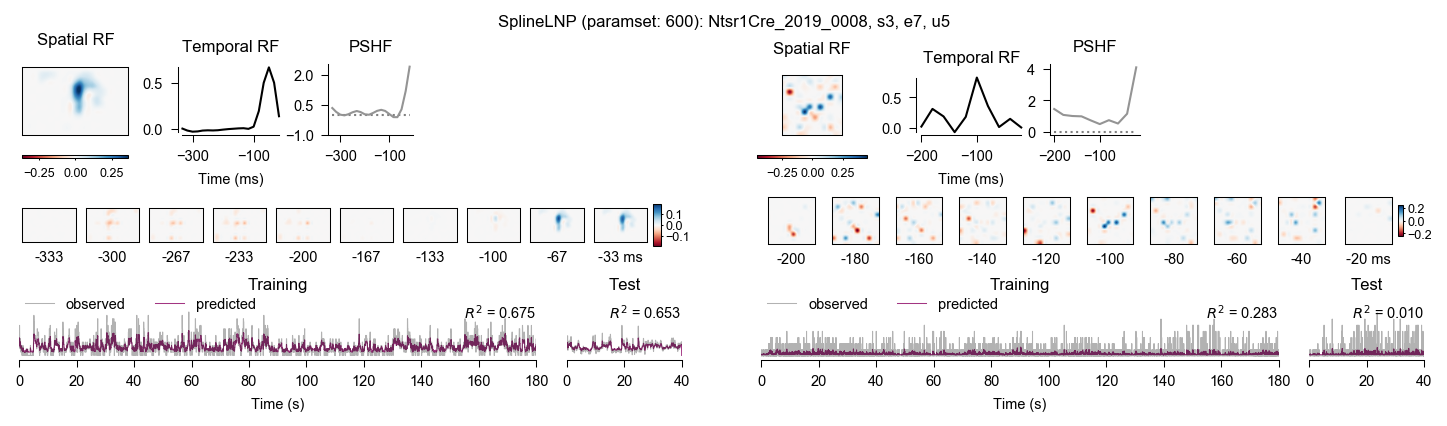

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 6, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 6, 'spl_paramset': 1}


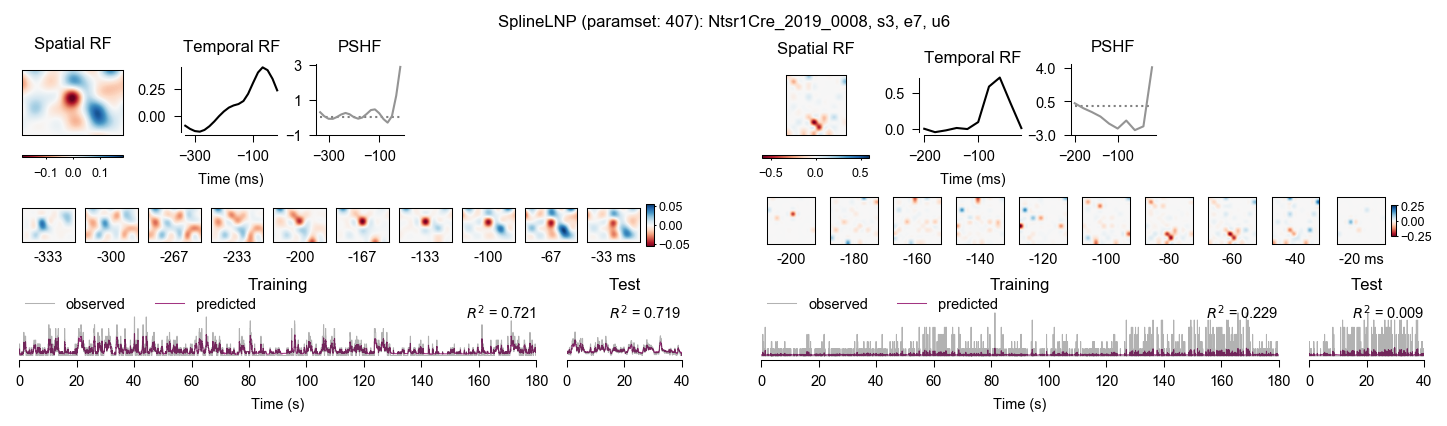

No hmov-SplineLNP model for {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'u': 11}.
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 11, 'spl_paramset': 1}


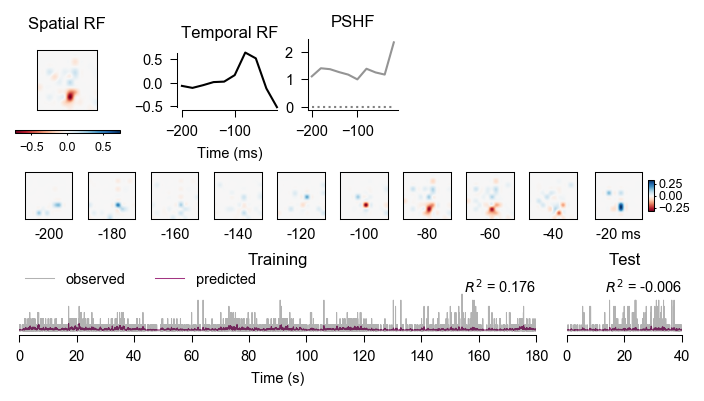

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 14, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 14, 'spl_paramset': 1}


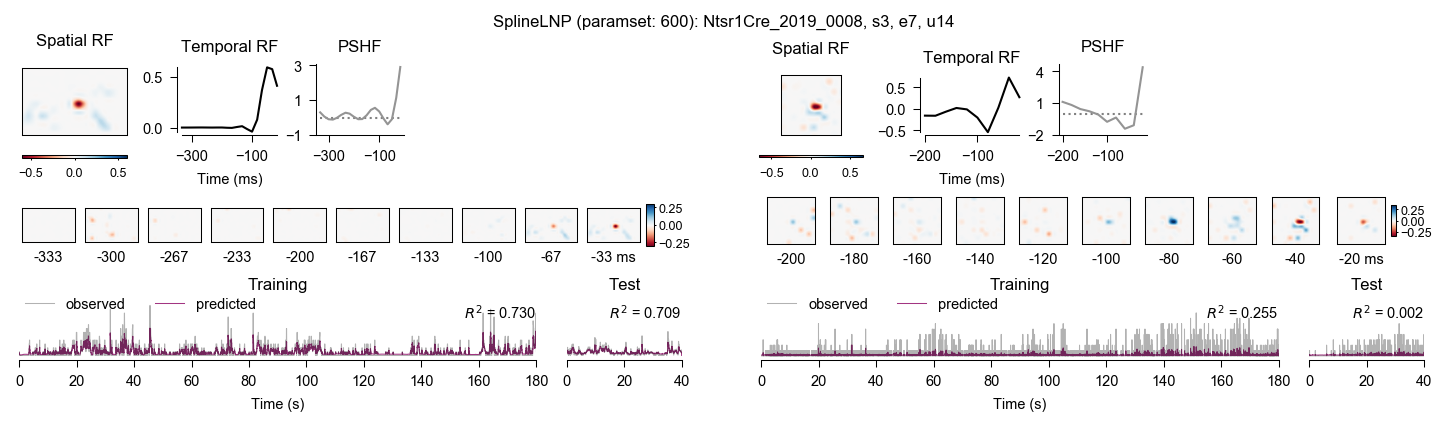

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 17, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 17, 'spl_paramset': 1}


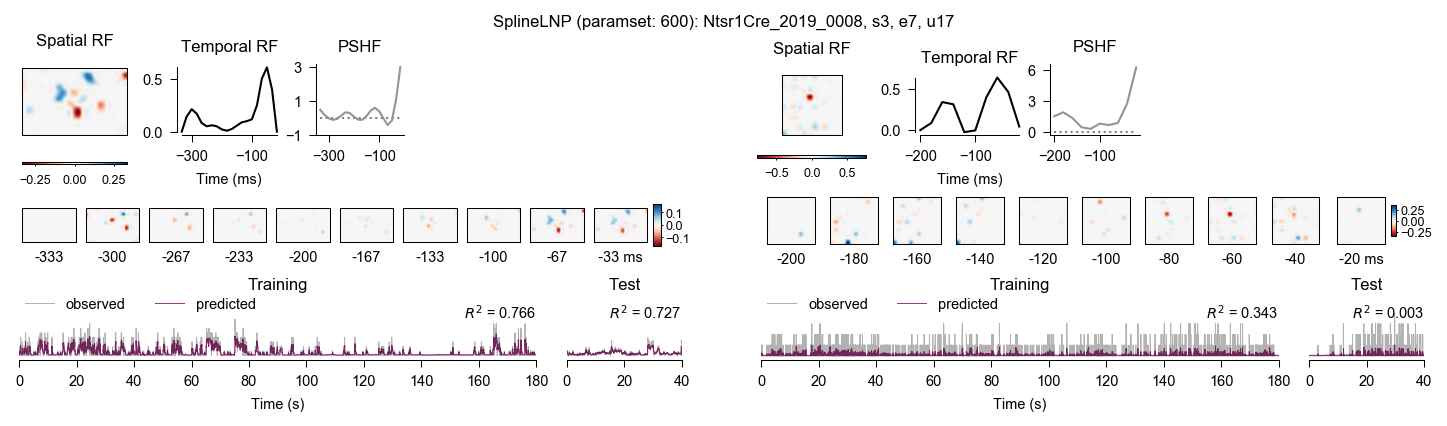

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 18, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 18, 'spl_paramset': 1}


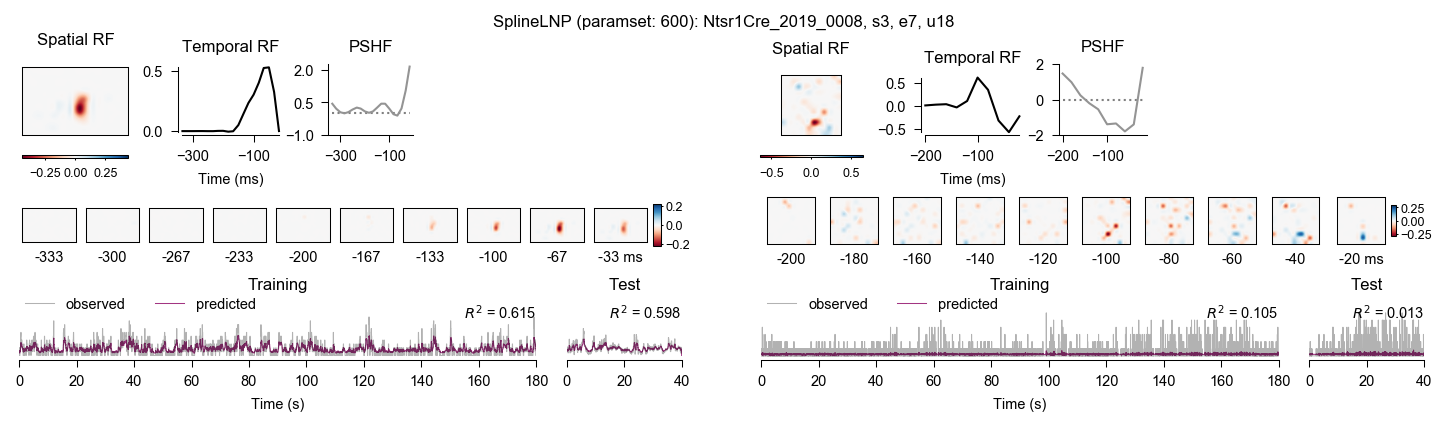

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 20, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 20, 'spl_paramset': 1}


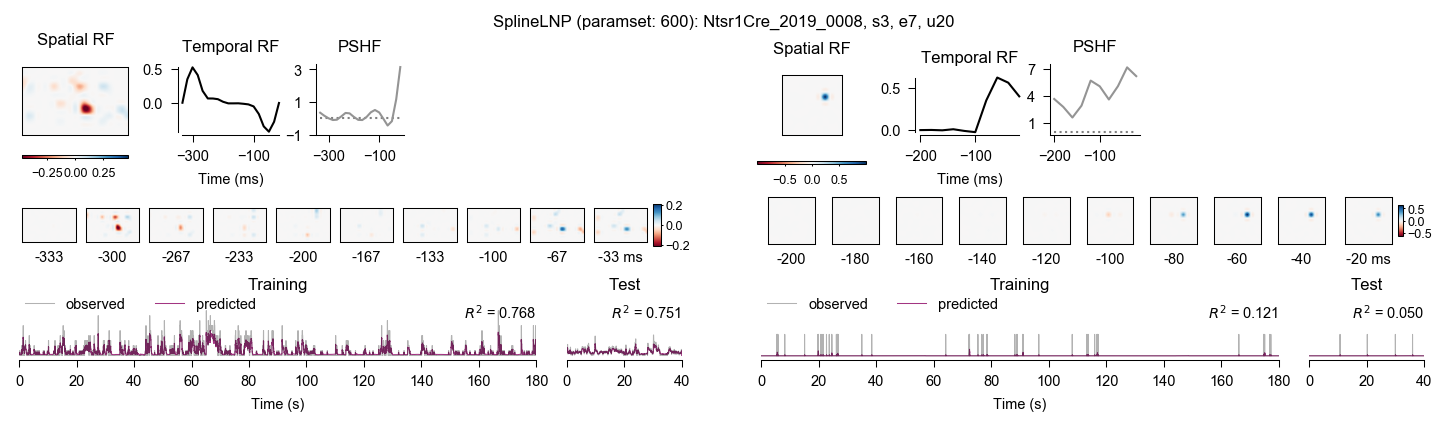

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 22, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 22, 'spl_paramset': 1}


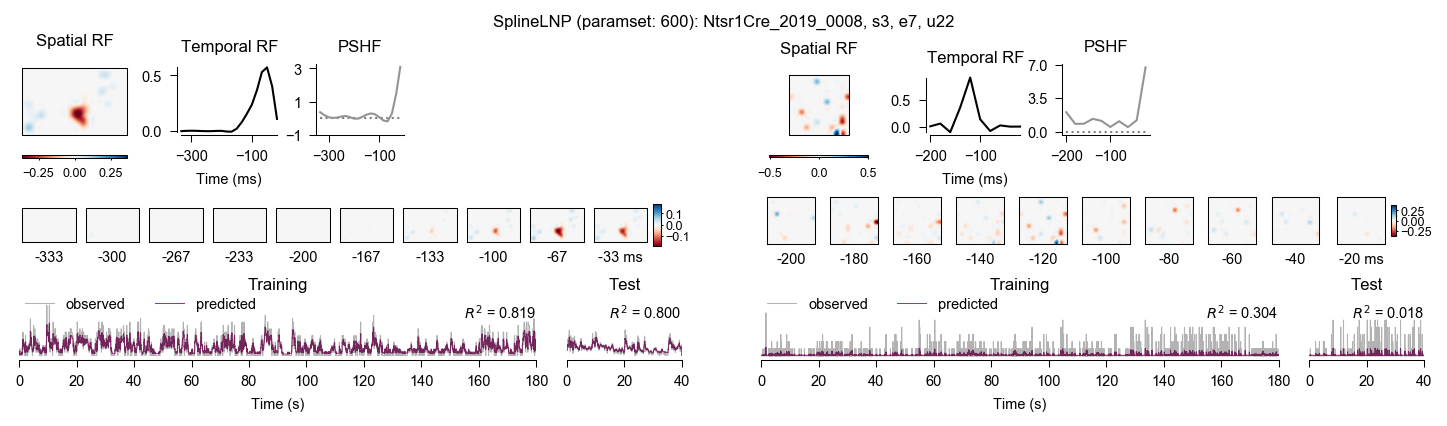

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 25, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 25, 'spl_paramset': 1}


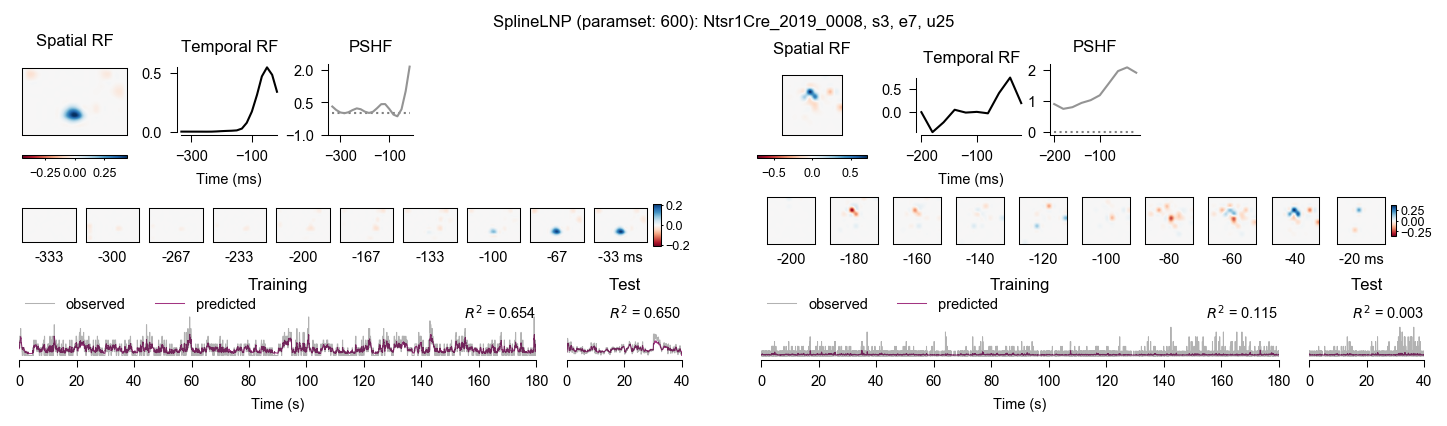

No hmov-SplineLNP model for {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'u': 26}.
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 26, 'spl_paramset': 1}


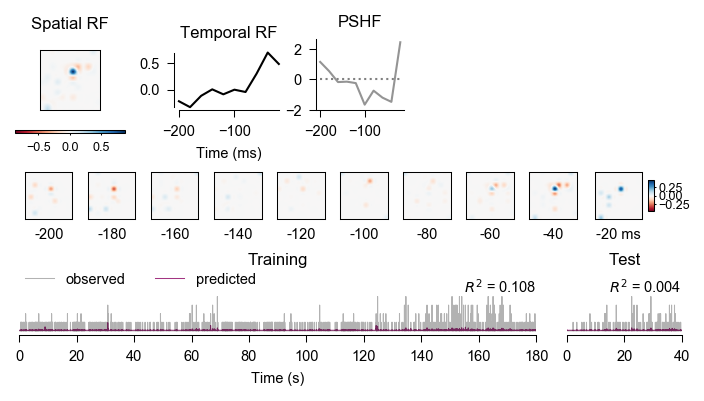

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 30, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 30, 'spl_paramset': 1}


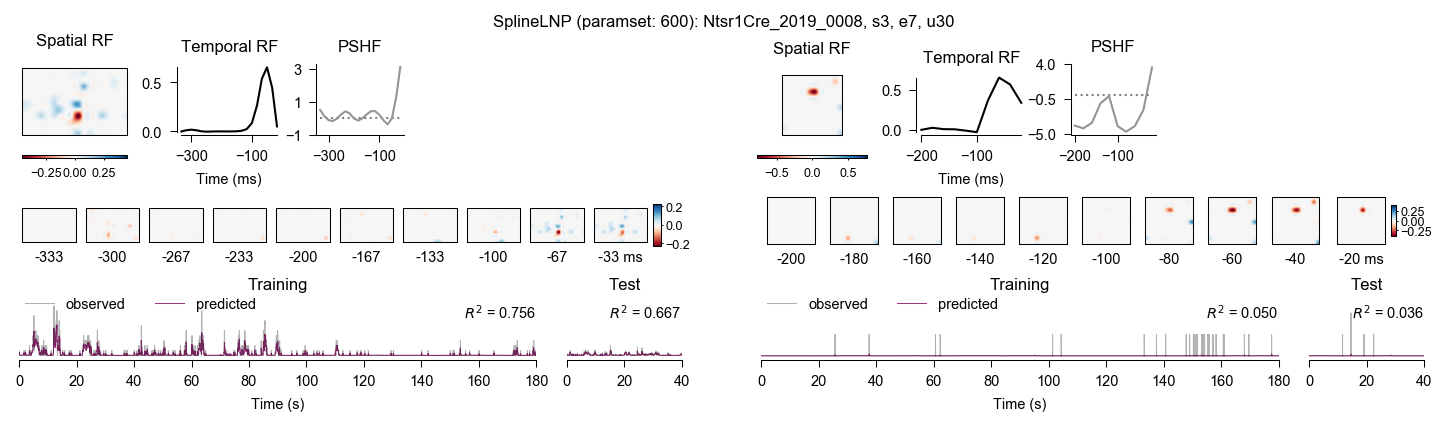

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 34, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 34, 'spl_paramset': 1}


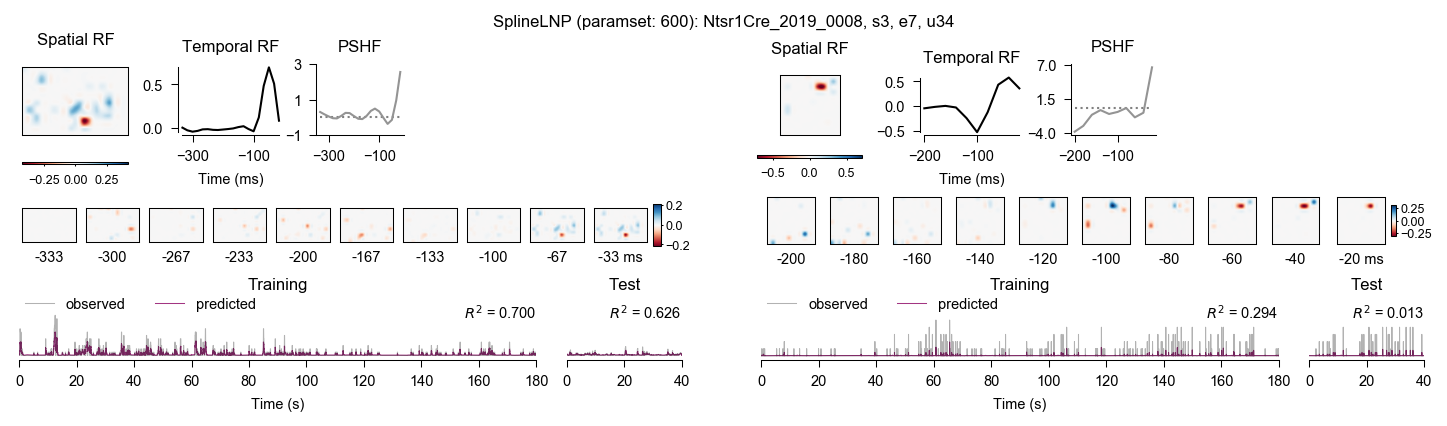

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 36, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 36, 'spl_paramset': 1}


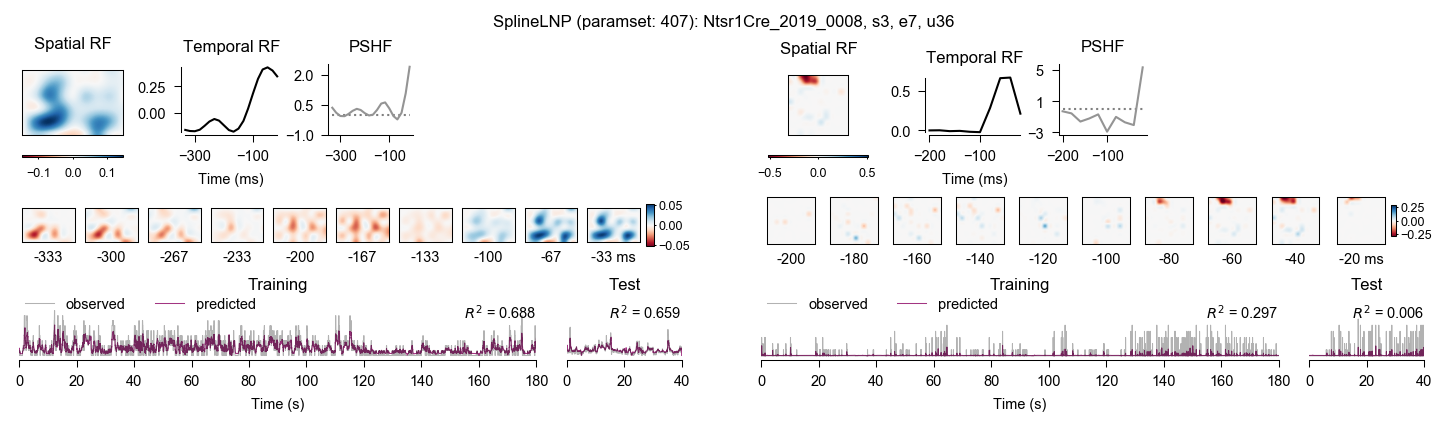

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 3, 'u': 19, 'spl_paramset': 1}


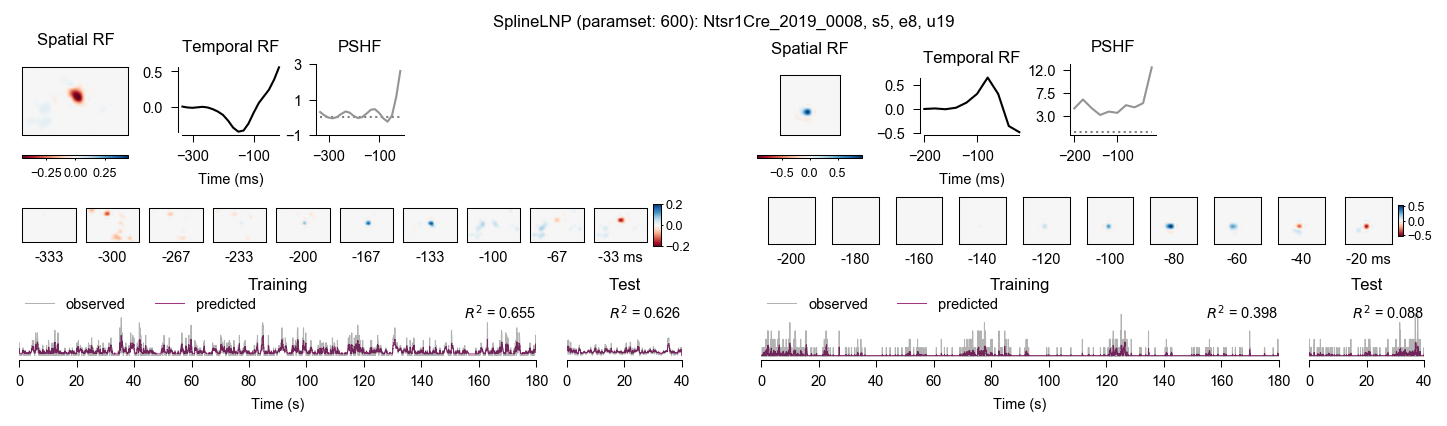

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 21, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 3, 'u': 21, 'spl_paramset': 1}


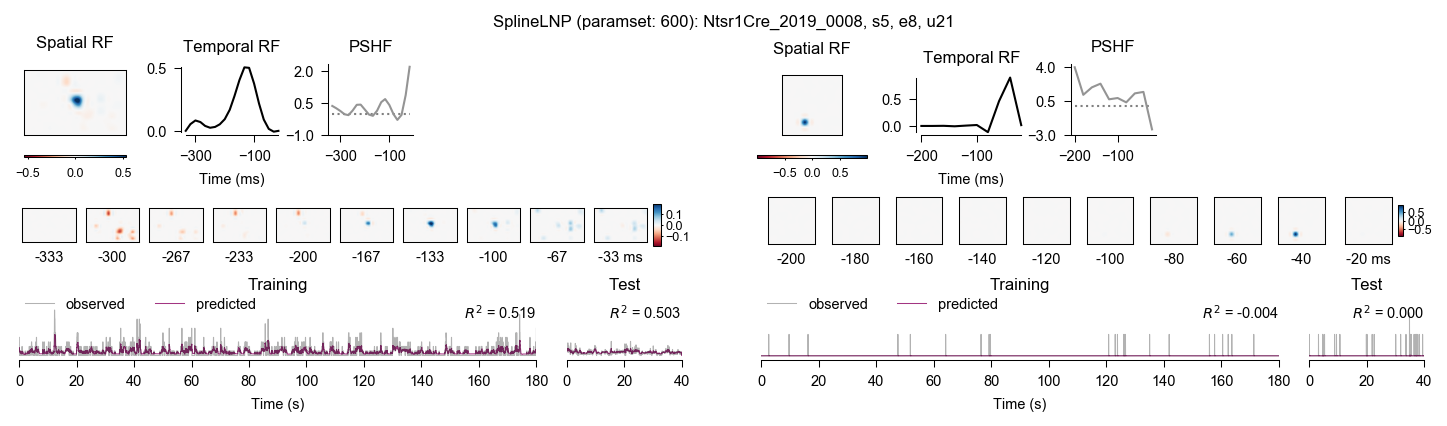

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 27, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 3, 'u': 27, 'spl_paramset': 1}


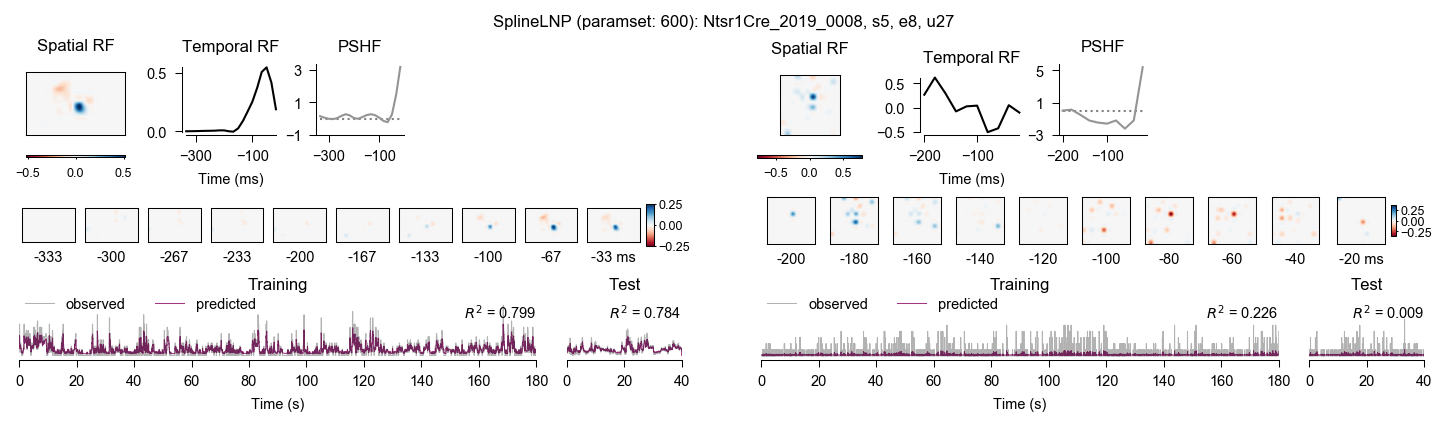

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 48, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 3, 'u': 48, 'spl_paramset': 1}


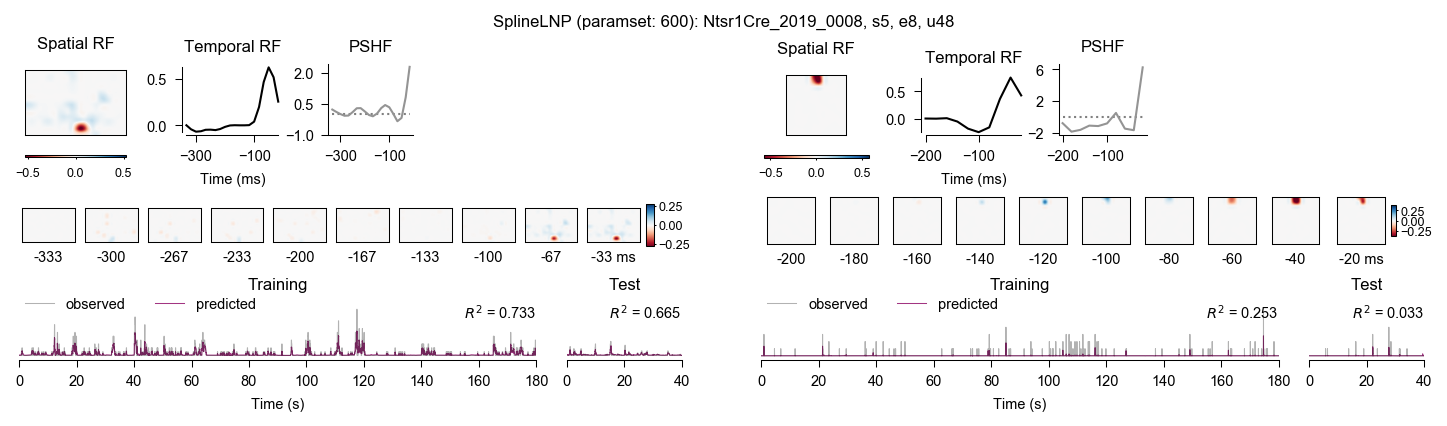

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 54, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 3, 'u': 54, 'spl_paramset': 1}


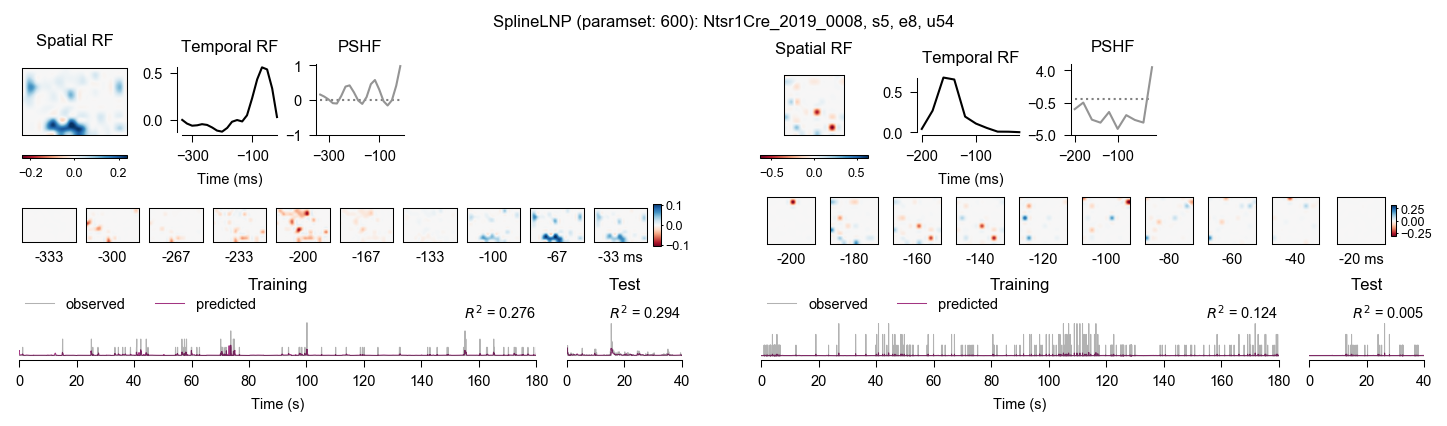

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 58, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 3, 'u': 58, 'spl_paramset': 1}


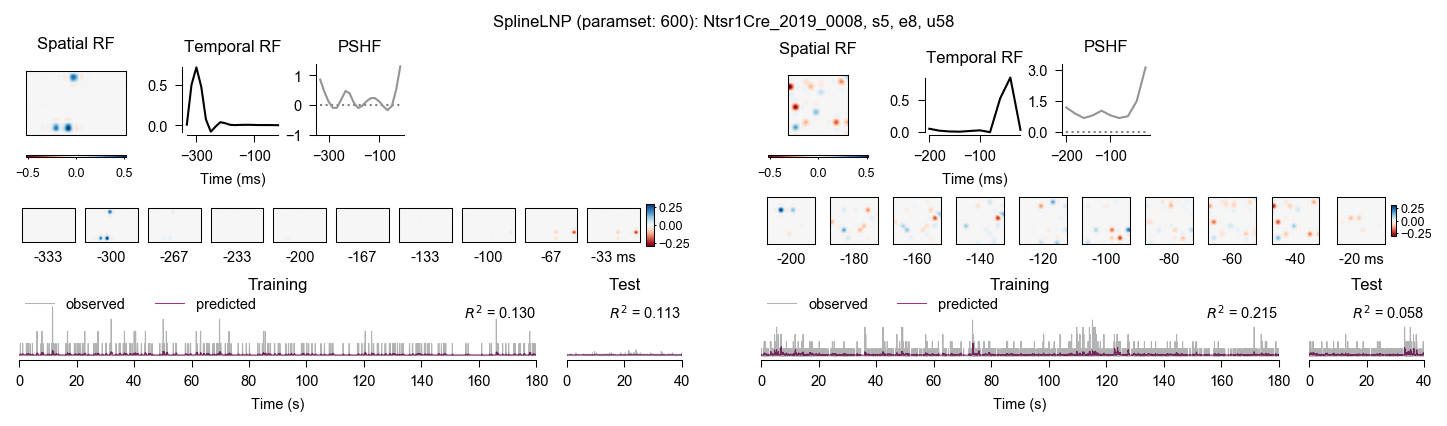

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 23, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 23, 'spl_paramset': 1}


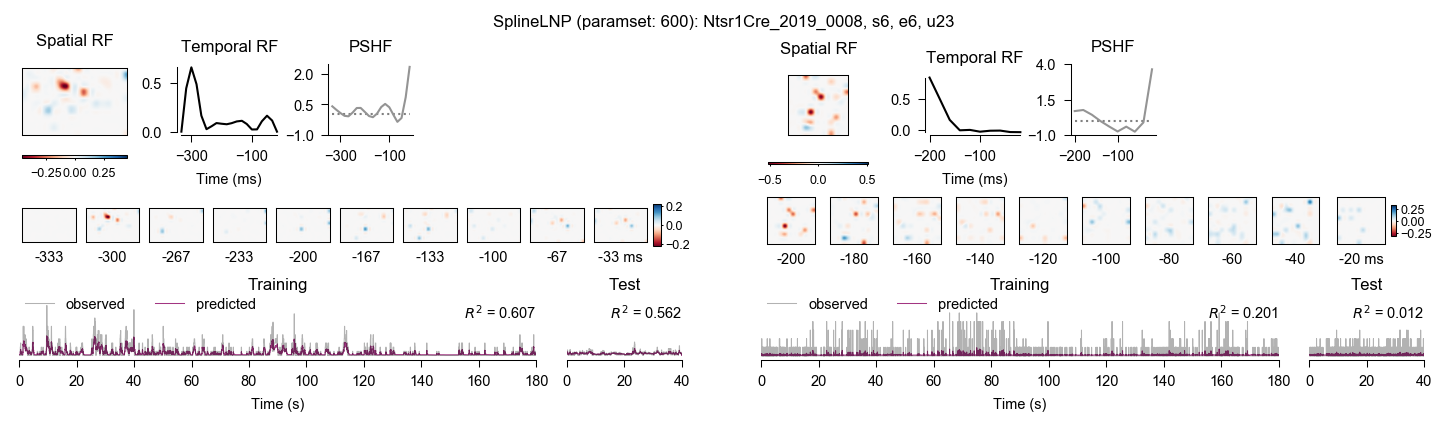

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 30, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 30, 'spl_paramset': 1}


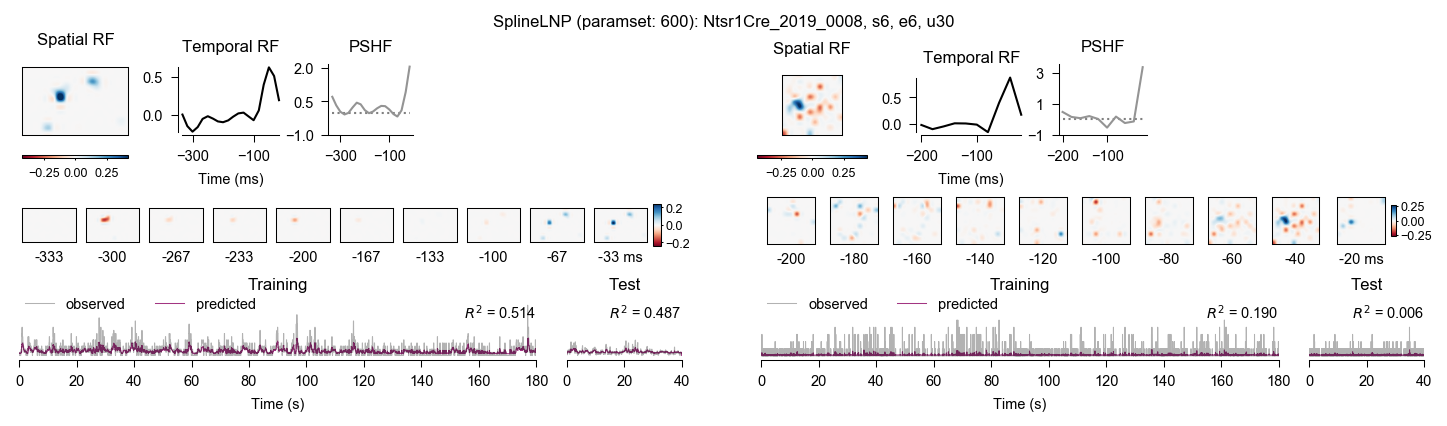

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 31, 'spl_paramset': 600}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 31, 'spl_paramset': 1}


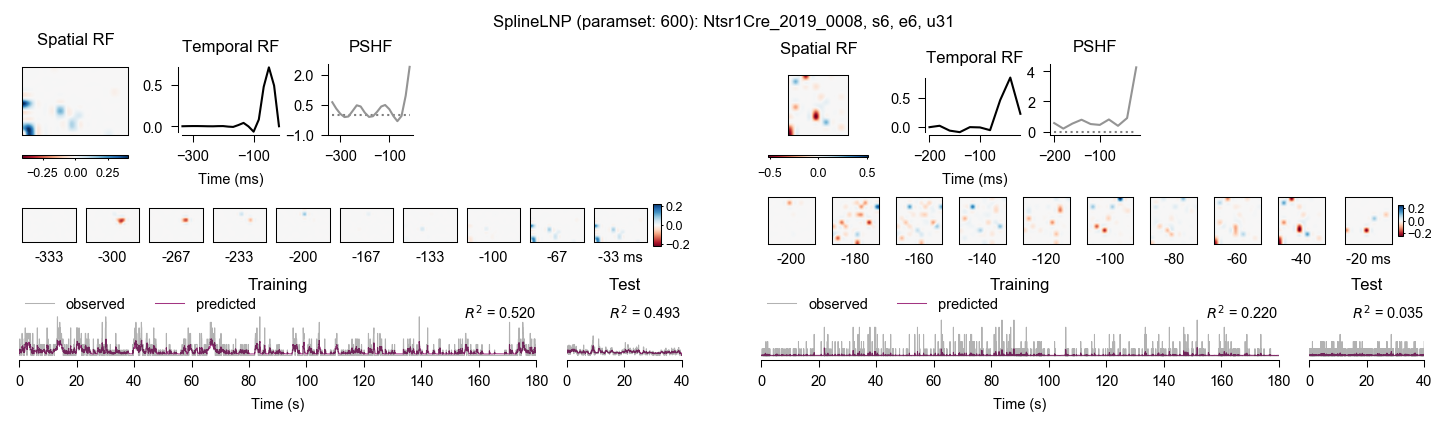

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 35, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 35, 'spl_paramset': 1}


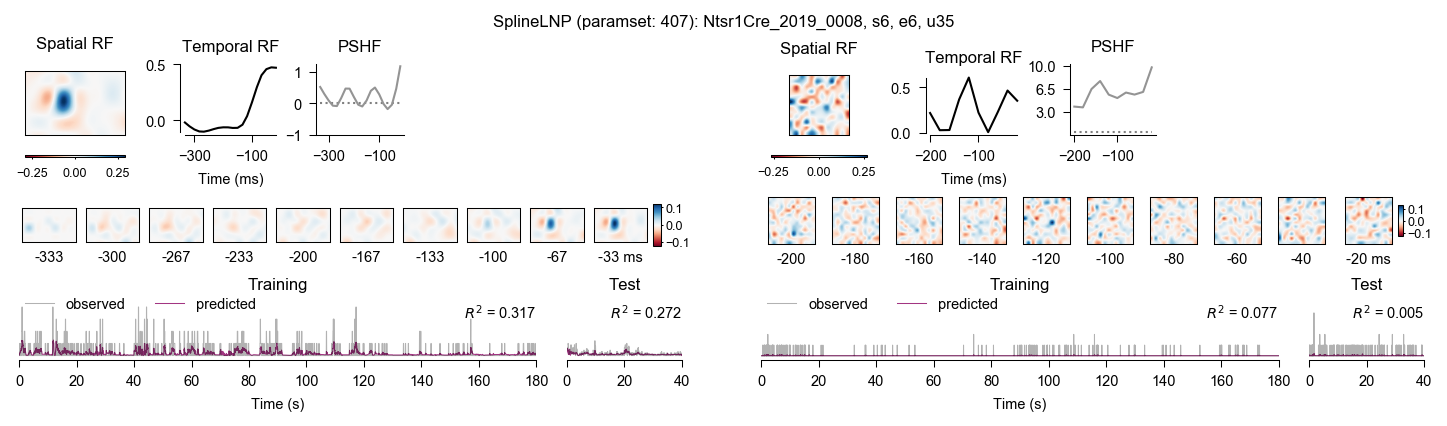

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 40, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 40, 'spl_paramset': 1}


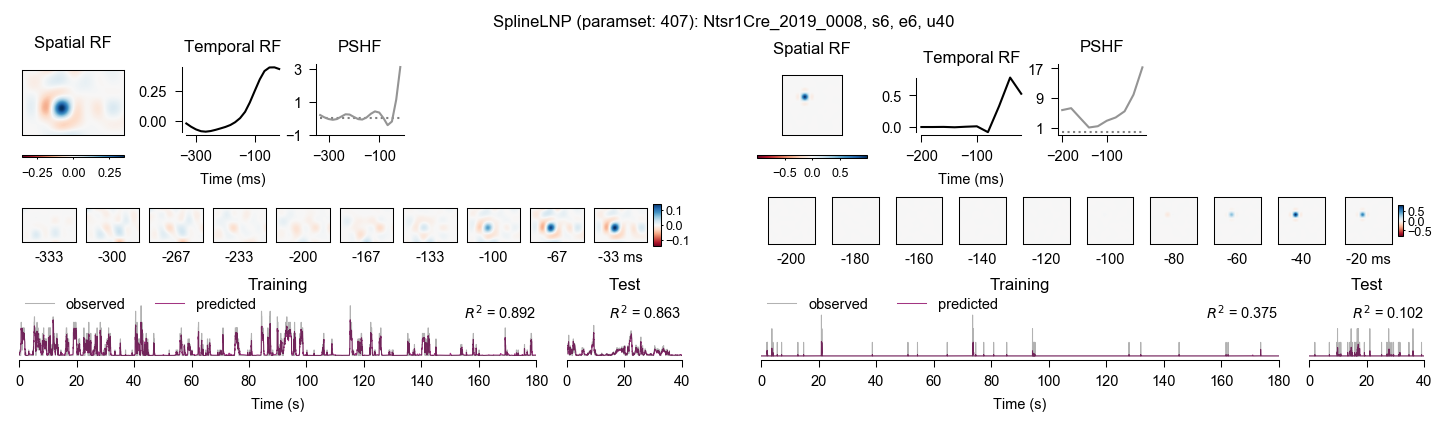

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 46, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 46, 'spl_paramset': 1}


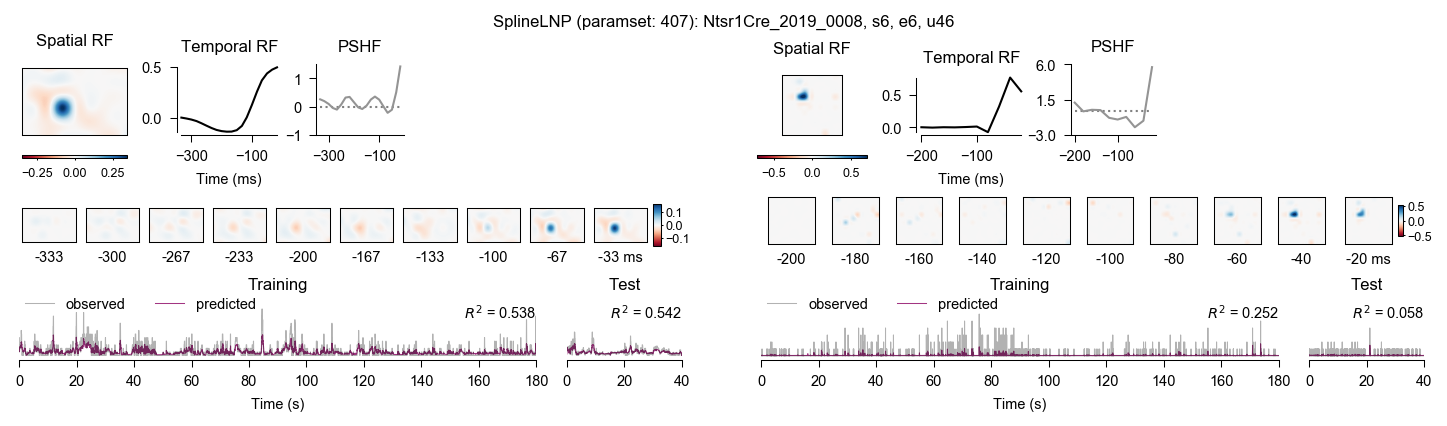

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 50, 'spl_paramset': 407}
No spnoise-SplineLNP model for {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'u': 50}.


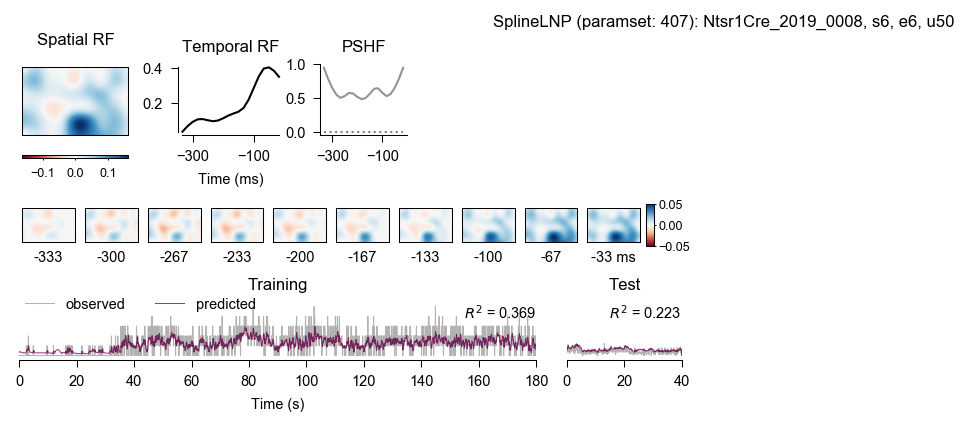

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 51, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 51, 'spl_paramset': 1}


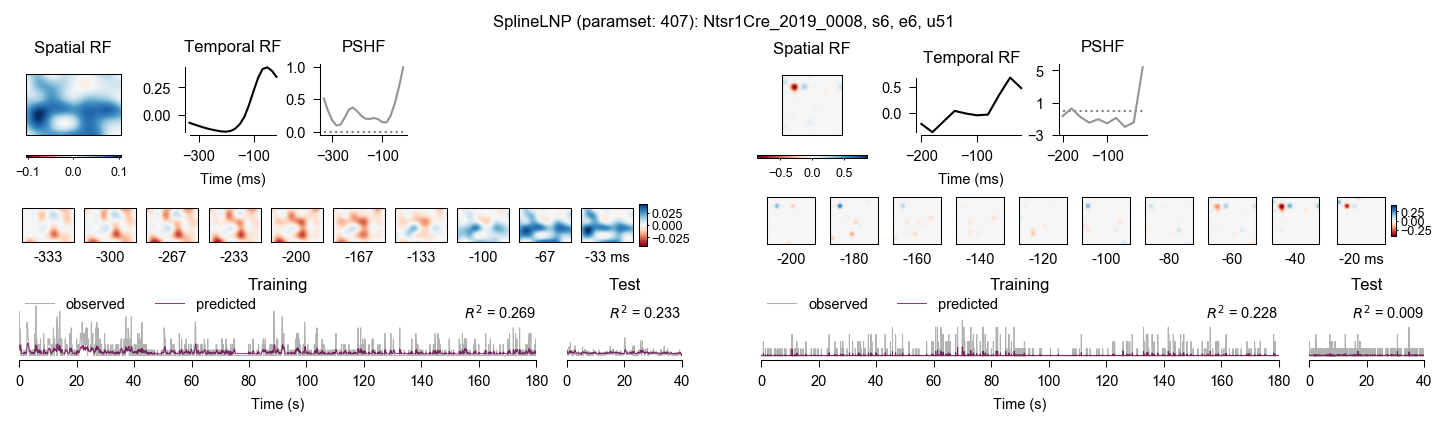

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 1, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 1, 'spl_paramset': 1}


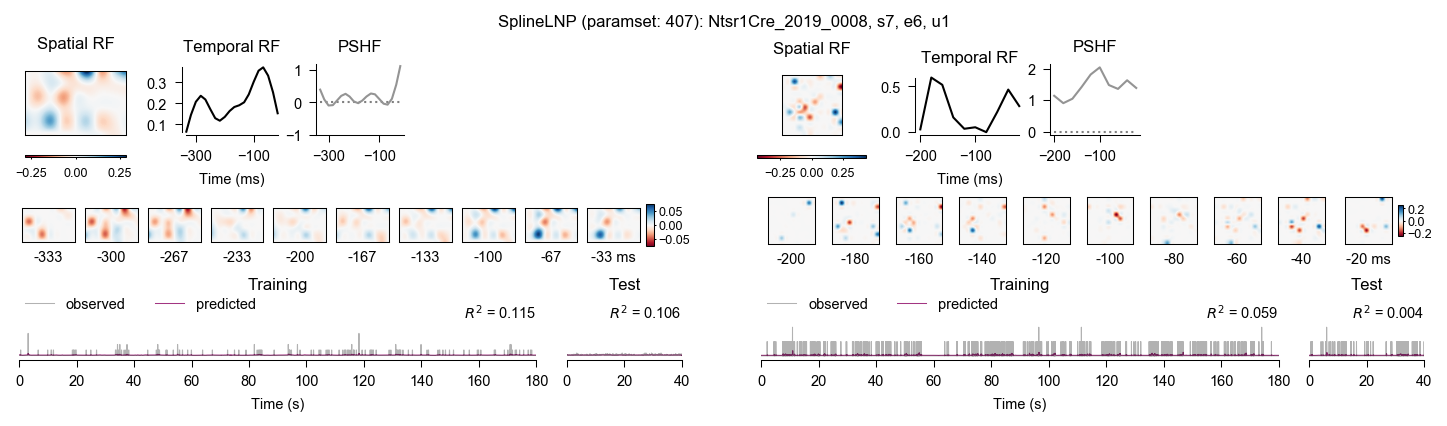

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 2, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 2, 'spl_paramset': 1}


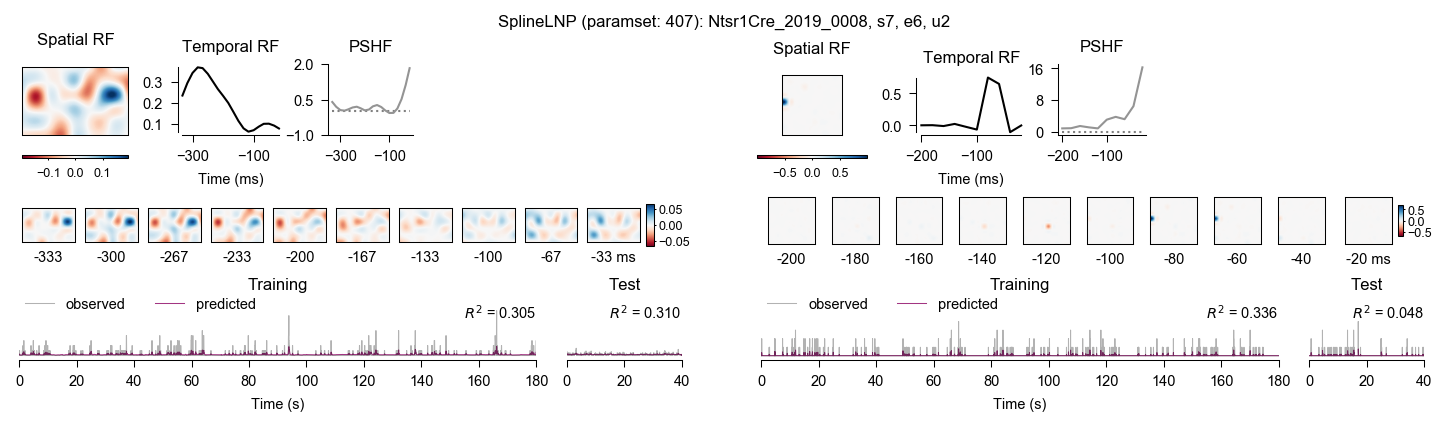

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 3, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 3, 'spl_paramset': 1}


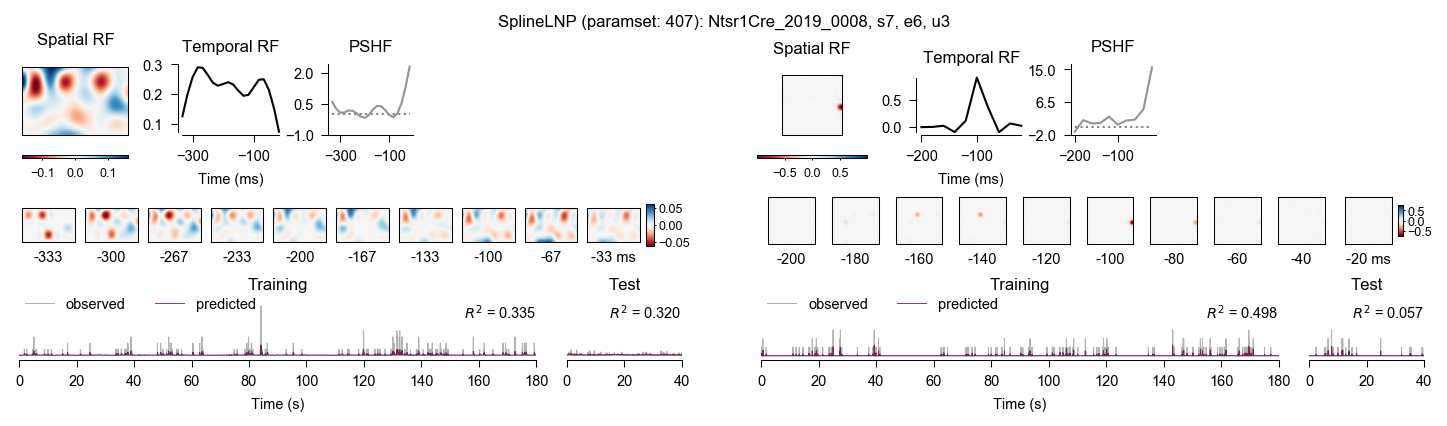

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 4, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 4, 'spl_paramset': 1}


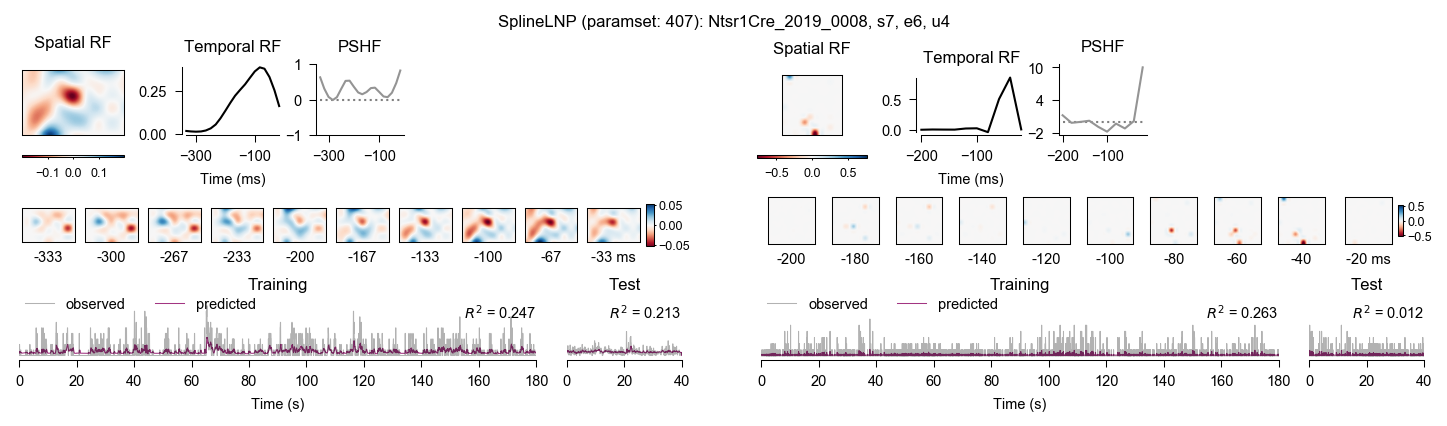

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 5, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 5, 'spl_paramset': 1}


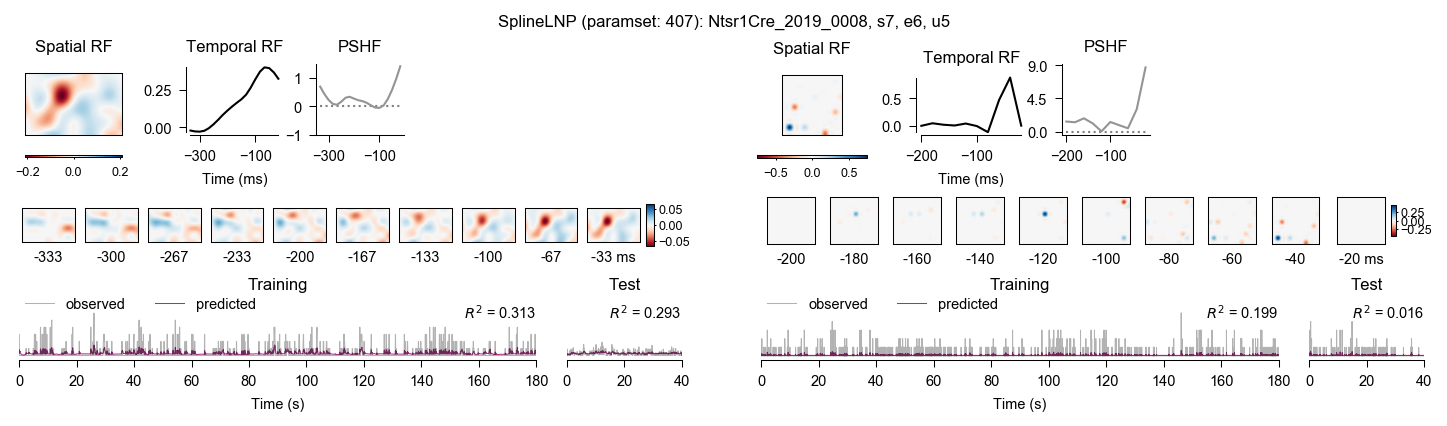

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 6, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 6, 'spl_paramset': 1}


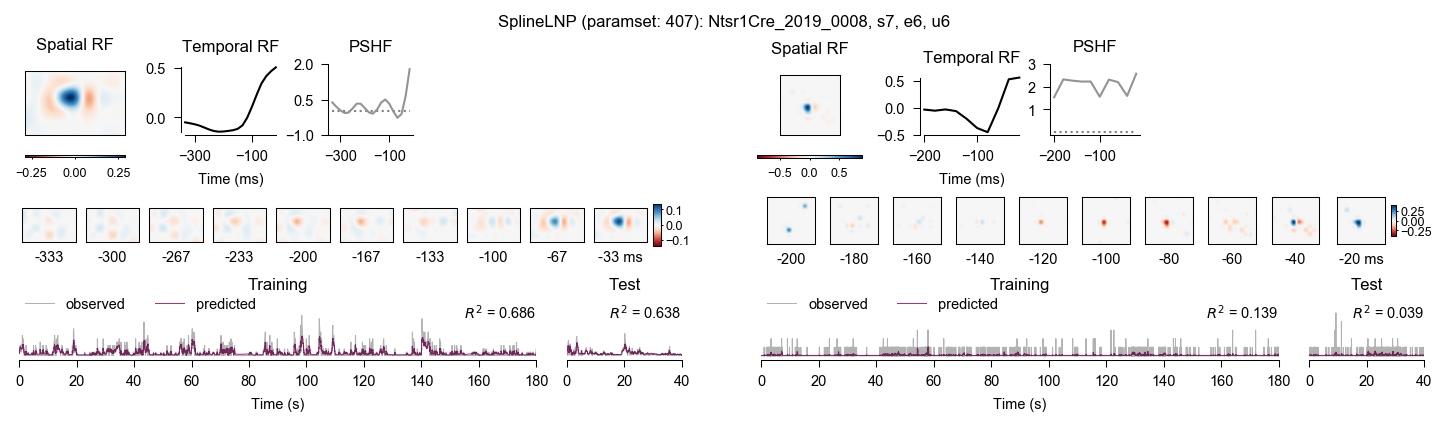

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 7, 'spl_paramset': 407}
No spnoise-SplineLNP model for {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'u': 7}.


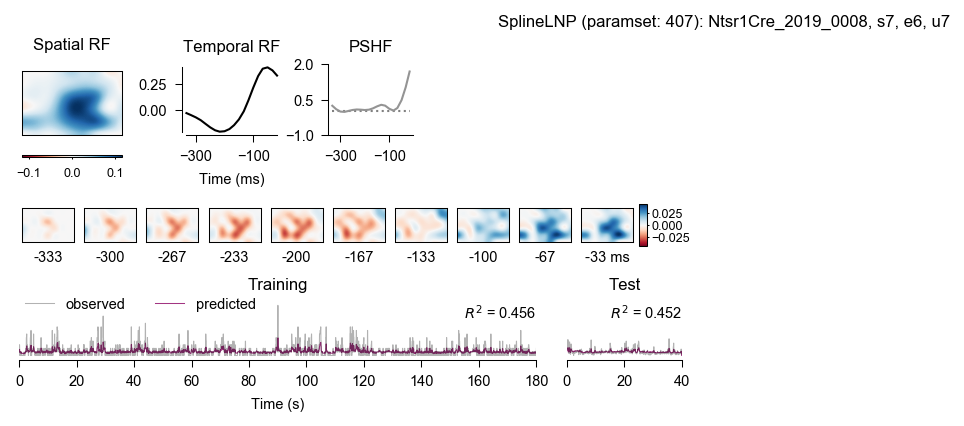

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 8, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 8, 'spl_paramset': 1}


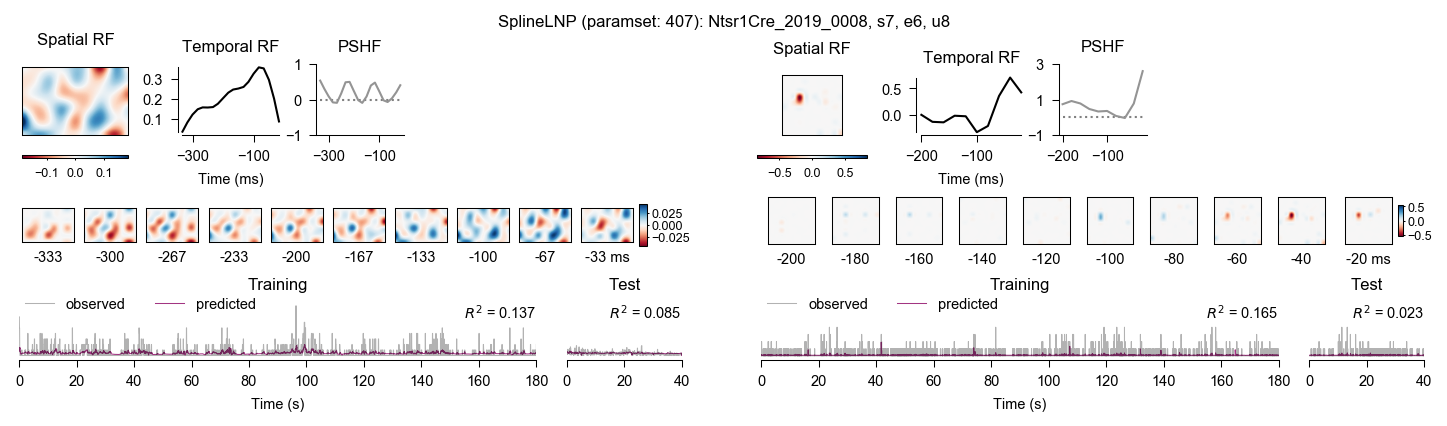

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 9, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 9, 'spl_paramset': 1}


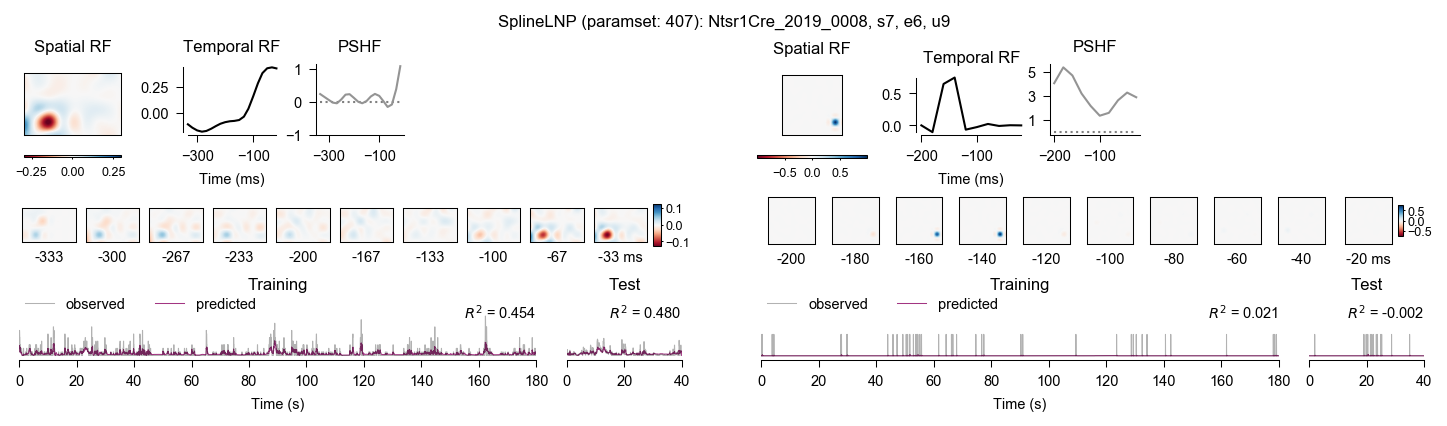

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 10, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 10, 'spl_paramset': 1}


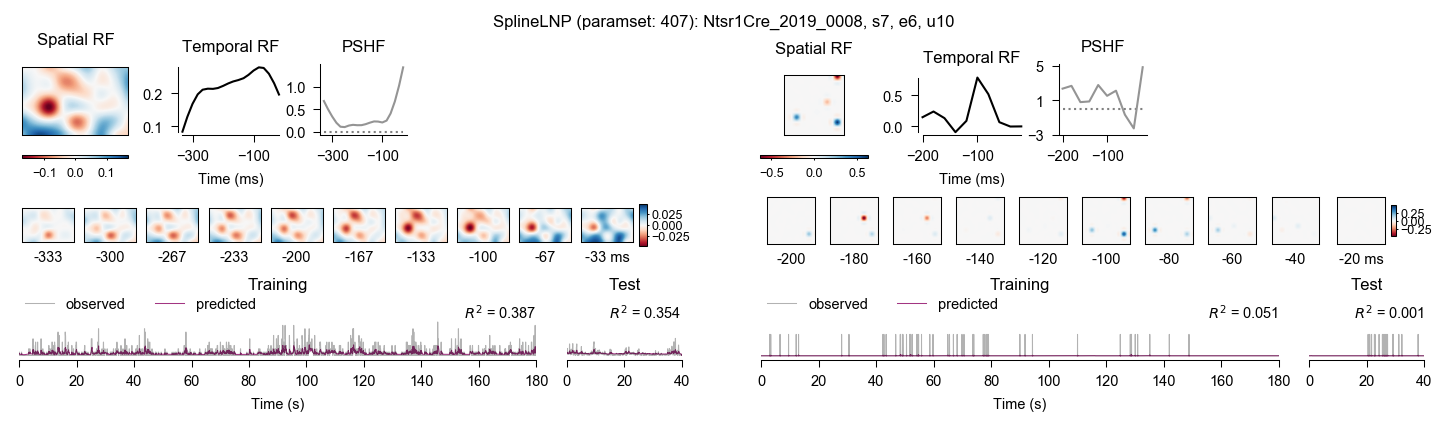

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 11, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 11, 'spl_paramset': 1}


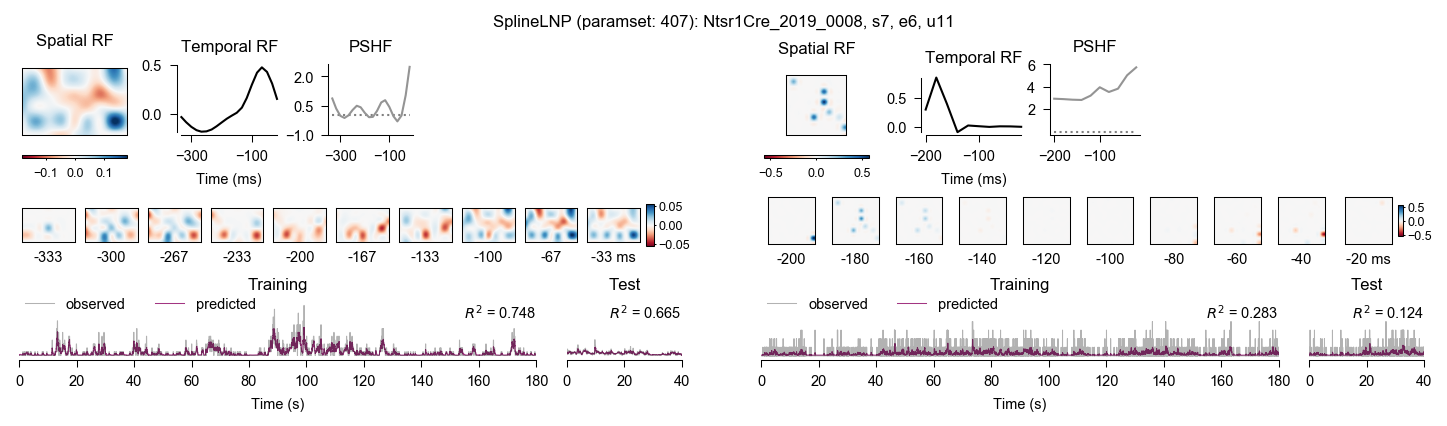

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 12, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 12, 'spl_paramset': 1}


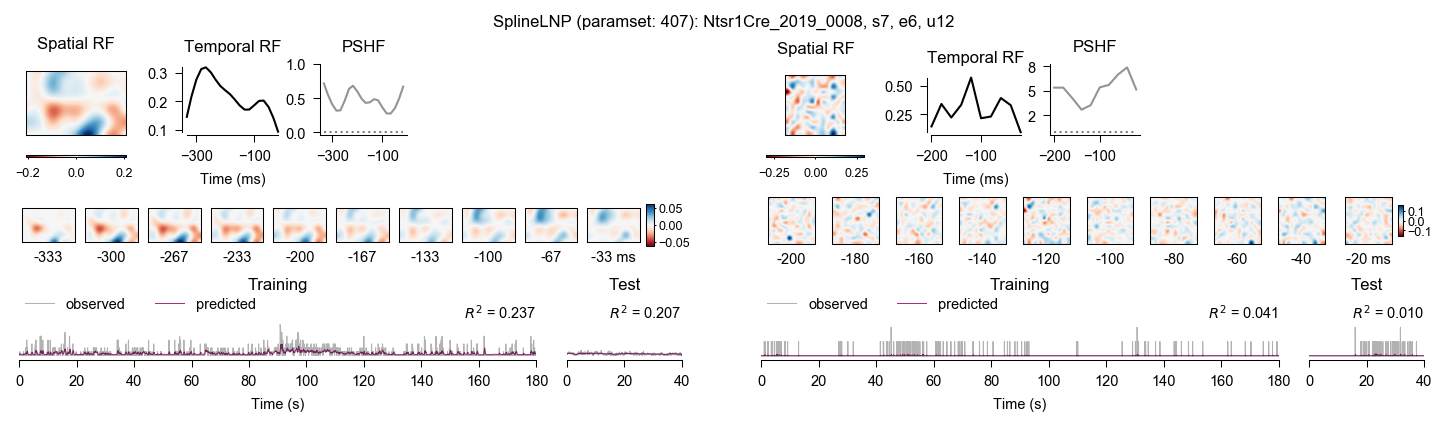

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 13, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 13, 'spl_paramset': 1}


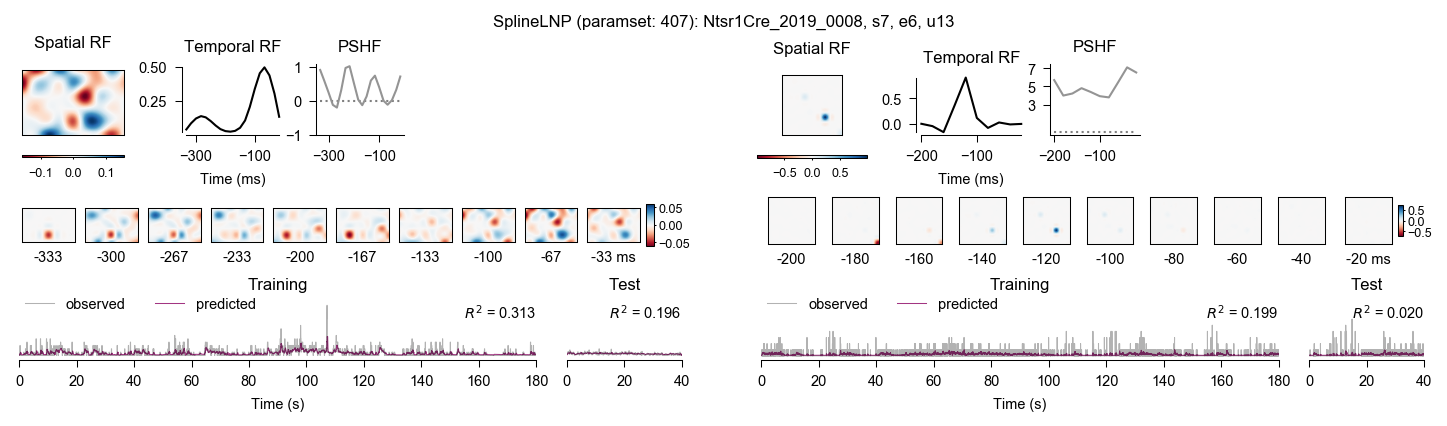

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 14, 'spl_paramset': 407}
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 14, 'spl_paramset': 1}


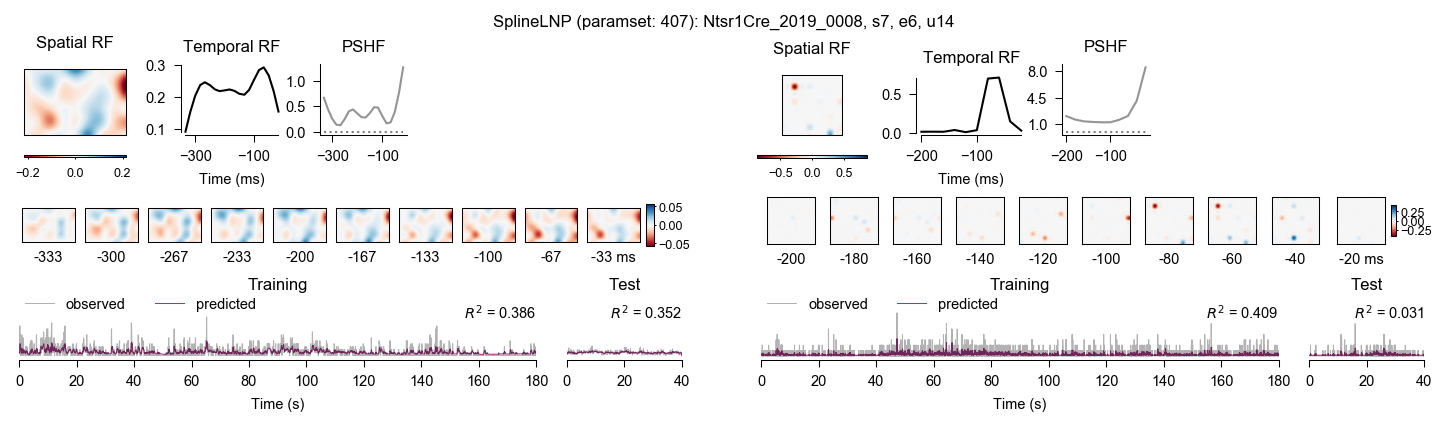

In [12]:
# Get units with Hmov recording and SplinelNP model
units = pd.DataFrame((Unit.Properties() & HmovUnit() & SplineLNP() & {'m': 'Ntsr1Cre_2019_0008'}).fetch(dj.key, as_dict=True))

# Plot best hmov vs spnoise model per unit
for i, unit in units.head(n=len(units)).iterrows():

    # Initialize figure (per unit)
    fig = plt.figure(figsize=cm2inch((24, 6.5)), dpi=150, constrained_layout=True)  # need to set constrained layout here!
    gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig, width_ratios=[1, 0.1, 1])  # 2nd column just for subfig spacing

    # unit = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'u': 19}
    unit = unit.to_dict()

    # Plot best hmov model
    key = (SplineLNP.Eval() & unit & {'spl_stim': 'hmov'}).fetch(dj.key)  # gets all hmov models for unit
    if len(key) == 0:
        print(f'No hmov-SplineLNP model for {unit}.')
        fig.add_subplot(gs[0])  # placeholder
    else:
        key = get_best_model(key, key_only=True, format='dict')  # picks best model
        fig, axs = plot_model(key, title=True, gs=gs[0])
        print(f'hmov key: {key}')

    # Plot best sparse noise model
    key = (SplineLNP.Eval() & unit & {'spl_stim': 'spnoise'}).fetch(dj.key)  # gets all spnoise models for unit
    if len(key) == 0:
        print(f'No spnoise-SplineLNP model for {unit}.')
        fig.add_subplot(gs[2])  # placeholder
    else:        
        key = get_best_model(key, key_only=True, format='dict')  # picks best model
        fig, axs = plot_model(key, title=False, gs=gs[2])
        print(f'spnoise key: {key}')

    plt.show()

### Plot specific hmov vs spnoise models

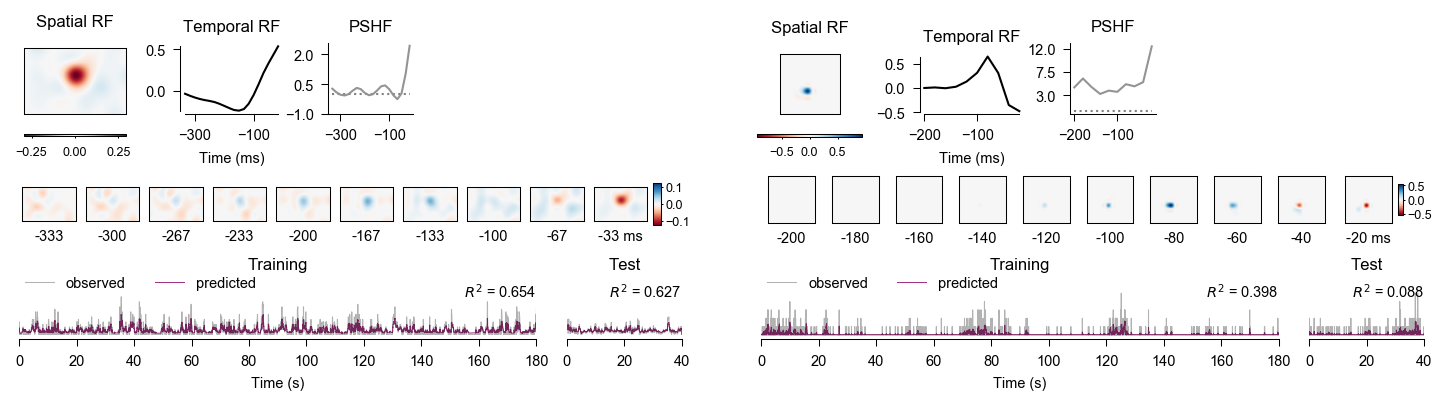

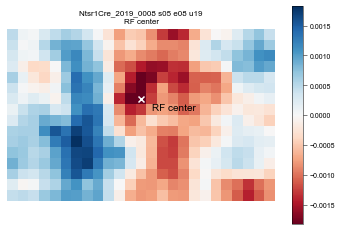

In [11]:
fig = plt.figure(figsize=cm2inch((24, 6.5)), dpi=150, constrained_layout=True)  # need to set constrained layout here!
gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig, width_ratios=[1, 0.1, 1])  # 2nd column just for subfig spacing

key = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'u': 19, 'e': 8, 'spl_paramset': 407}  # hmov
fig, axs = plot_model(key, gs=gs[0])

key = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'u': 19, 'e': 3, 'spl_paramset': 1}  # spnoise
fig, axs = plot_model(key, gs=gs[2])

fig, ax = (HmovUnit() & unit).plot_STA()

## Plot only RF filters

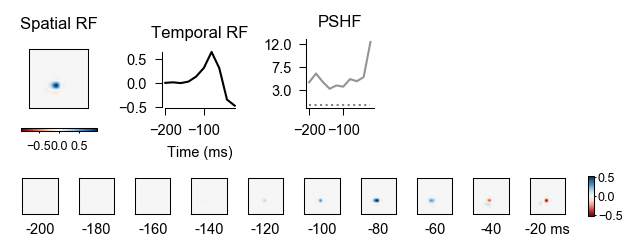

In [8]:
key = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'u': 19, 'e': 3, 'spl_paramset': 1}  # spnoise
fig, axs = plot_rf_filters(key)

## Plot only train vs test PSTH traces

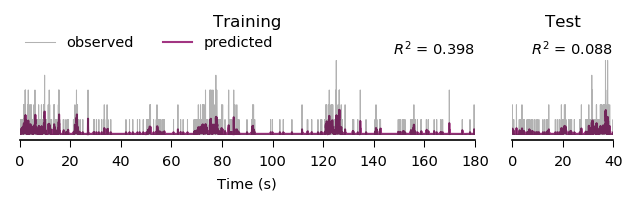

In [5]:
key = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'u': 19, 'e': 3, 'spl_paramset': 1}  # spnoise
fig, axs = plot_train_test_psth(key, figsize=(10.5, 3.2), dpi=150, gs=None)
# plt.savefig('stRF_traces.pdf')

In [6]:
axs

{'axs_rf_filt': {'rf_filt': <matplotlib.axes._subplots.AxesSubplot at 0x7f81a08bb410>},
 'axs_psth': {'train_psth': <matplotlib.axes._subplots.AxesSubplot at 0x7f8181897dd0>,
  'test_psth': <matplotlib.axes._subplots.AxesSubplot at 0x7f81818fde50>}}

## Plot STA

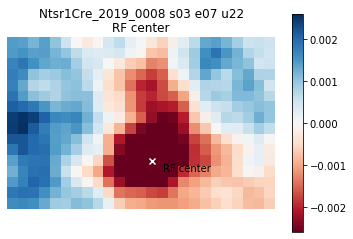

In [6]:
key = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'u': 22, 'e': 7, 'spl_paramset': 400}
fig, ax = (HmovUnit() & key).plot_STA()

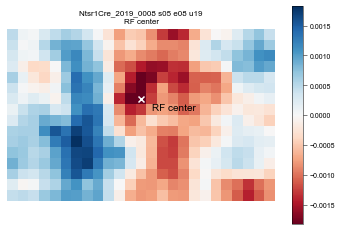

In [10]:
key = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'u': 19}
fig, ax = (HmovUnit() & key).plot_STA()